# Data Analisis - Brazilian Municipalities Health Indicators.

### Felipe Demenech Vasconcelos

##### Source: https://www.kaggle.com/valdirsantos/brazilian-municipalities-health-indicators

In [349]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
first_df = pd.read_csv('dados/brazil_municipalities_health_indicators2018.CSV', sep = ';')

In [351]:
first_df.head()

,localIBGE_id,municipality,state,population,pop_share_above60,gdp_capita,city_exp_health_capita,public_doctors_capita,disease_deaths_capita,death_rate_hospitalization,infant_mortality,sewage_rating,water_service_rating,garbage_service_rating
0,1100015,Alta Floresta D'Oeste,RO,23167,"0,092778668","19,61175","665,3622562","2,158242327","4,791297967","0,022015652","7,352941176",NaN,"4,681414249","1,85"
1,1100023,Ariquemes,RO,106168,"0,071803517","21,38967","582,7972943","1,695426117","4,125536885","0,034575145","15,45778835",4,"7,642549074","6,777636532"
2,1100031,Cabixi,RO,5438,"0,112317131","22,3158","1051,795601","5,516734093","5,516734093","0,045544713","12,19512195",NaN,"5,3","3,05"
3,1100049,Cacoal,RO,84813,"0,08922696","24,03791","480,0175392","2,35812906","5,046396189","0,044616181","13,13969571","5,333978235","6,010461526","1,85"
4,1100056,Cerejeiras,RO,16444,"0,103808729","25,00971","777,9664406","2,432498176","5,837995622","0,026051115","15,15151515",NaN,"6,862725985","4,97296397"


### DataFrame preparation.

In [352]:
second_df = first_df[['municipality',
               'state',
               'population',
               'disease_deaths_capita',
               'death_rate_hospitalization',
               'infant_mortality',
               'sewage_rating',
               'water_service_rating',
               'garbage_service_rating']]

In [353]:
second_df.head()

,municipality,state,population,disease_deaths_capita,death_rate_hospitalization,infant_mortality,sewage_rating,water_service_rating,garbage_service_rating
0,Alta Floresta D'Oeste,RO,23167,"4,791297967","0,022015652","7,352941176",NaN,"4,681414249","1,85"
1,Ariquemes,RO,106168,"4,125536885","0,034575145","15,45778835",4,"7,642549074","6,777636532"
2,Cabixi,RO,5438,"5,516734093","0,045544713","12,19512195",NaN,"5,3","3,05"
3,Cacoal,RO,84813,"5,046396189","0,044616181","13,13969571","5,333978235","6,010461526","1,85"
4,Cerejeiras,RO,16444,"5,837995622","0,026051115","15,15151515",NaN,"6,862725985","4,97296397"


In [354]:
second_df.columns = ['City', 'State', 'Population', 'Disease Deaths', 'Death Rate Hospitalization',
                     'Infant Mortality', 'Sewage Rating', 'Water Service Rating', 'Garbage Service Rating']

In [355]:
second_df.head()

,City,State,Population,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Sewage Rating,Water Service Rating,Garbage Service Rating
0,Alta Floresta D'Oeste,RO,23167,"4,791297967","0,022015652","7,352941176",NaN,"4,681414249","1,85"
1,Ariquemes,RO,106168,"4,125536885","0,034575145","15,45778835",4,"7,642549074","6,777636532"
2,Cabixi,RO,5438,"5,516734093","0,045544713","12,19512195",NaN,"5,3","3,05"
3,Cacoal,RO,84813,"5,046396189","0,044616181","13,13969571","5,333978235","6,010461526","1,85"
4,Cerejeiras,RO,16444,"5,837995622","0,026051115","15,15151515",NaN,"6,862725985","4,97296397"


In [356]:
df = second_df

In [357]:
df.State.unique()

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [358]:
region = {'RS': 'South', 'SC': 'South', 'PR': 'South',
          'GO': 'Midwest', 'MS': 'Midwest', 'MT': 'Midwest', 'DF': 'Midwest',
          'SP': 'Southeast', 'MG': 'Southeast', 'RJ': 'Southeast', 'ES': 'Southeast',
          'BA': 'Northeast', 'PI': 'Northeast', 'MA': 'Northeast', 'PE': 'Northeast', 'PB': 'Northeast',
          'CE': 'Northeast', 'RN': 'Northeast', 'PA': 'Northeast', 'AL': 'Northeast', 'SE': 'Northeast', 
          'RO': 'North', 'RR': 'North', 'AM': 'North', 'AC': 'North', 'PA': 'North', 'AP': 'North', 'TO': 'North'}

In [359]:
def get_region(State):
    return region[State]

In [360]:
df['Region'] = df['State'].apply(get_region)

<ipython-input-360-d373d6959cbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['State'].apply(get_region)


In [361]:
df = df[['City', 'State', 'Region',	'Population', 'Disease Deaths', 'Death Rate Hospitalization',
         'Infant Mortality', 'Sewage Rating', 'Water Service Rating', 'Garbage Service Rating']]

In [362]:
df

,City,State,Region,Population,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Sewage Rating,Water Service Rating,Garbage Service Rating
0,Alta Floresta D'Oeste,RO,North,23167,"4,791297967","0,022015652","7,352941176",NaN,"4,681414249","1,85"
1,Ariquemes,RO,North,106168,"4,125536885","0,034575145","15,45778835",4,"7,642549074","6,777636532"
2,Cabixi,RO,North,5438,"5,516734093","0,045544713","12,19512195",NaN,"5,3","3,05"
3,Cacoal,RO,North,84813,"5,046396189","0,044616181","13,13969571","5,333978235","6,010461526","1,85"
4,Cerejeiras,RO,North,16444,"5,837995622","0,026051115","15,15151515",NaN,"6,862725985","4,97296397"
...,...,...,...,...,...,...,...,...,...,...
5565,Morrinhos,GO,Midwest,45716,"6,19039286","0,030280827","15,82278481","5,936776645","7,734092314","1,85"
5566,Sanclerlandia,GO,Midwest,7642,"4,841664486","0,016429235",0,"4,708792538","6,485312539","1,85"
5567,Santo Antonio da Barra,GO,Midwest,4787,"5,431376645","0,039203136",0,NaN,"5,794581145","1,85"
5568,Sitio d'Abadia,GO,Midwest,2977,"5,710446758","0,045218966","37,03703704",NaN,"4,27517337","1,85"


In [363]:
df['State'].value_counts()

MG    853
SP    645
RS    497
BA    417
PR    399
SC    295
GO    246
PI    224
PB    223
MA    217
PE    185
CE    184
RN    167
PA    144
MT    141
TO    139
AL    102
RJ     92
MS     79
ES     78
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
Name: State, dtype: int64

In [364]:
group_regions = df.groupby('Region')

In [365]:
group_regions.groups

{'Midwest': Int64Index([4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953,
             ...
             5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569],
            dtype='int64', length=467),
 'North': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5417],
            dtype='int64', length=450),
 'Northeast': Int64Index([ 427,  428,  429,  430,  431,  432,  433,  434,  435,  436,
             ...
             5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5522, 5523],
            dtype='int64', length=1794),
 'South': Int64Index([3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772,
             ...
             5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5552, 5553],
            dtype='int64', length=1191),
 'Southeast': Int64Index([2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124,
             ...
             5534, 5535, 5536, 5537, 

In [366]:
df['Infant Mortality'].agg(['mean', 'max', 'min'])

max    96,77419355
min              0
Name: Infant Mortality, dtype: object

In [367]:
df.dtypes

City                          object
State                         object
Region                        object
Population                     int64
Disease Deaths                object
Death Rate Hospitalization    object
Infant Mortality              object
Sewage Rating                 object
Water Service Rating          object
Garbage Service Rating        object
dtype: object

### Converting 'str' values separated whit ',' to float values.

In [368]:
df.select_dtypes(include = 'number').head()

,Population
0,23167
1,106168
2,5438
3,84813
4,16444


In [369]:
df.select_dtypes(include = 'object').head()

,City,State,Region,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Sewage Rating,Water Service Rating,Garbage Service Rating
0,Alta Floresta D'Oeste,RO,North,"4,791297967","0,022015652","7,352941176",NaN,"4,681414249","1,85"
1,Ariquemes,RO,North,"4,125536885","0,034575145","15,45778835",4,"7,642549074","6,777636532"
2,Cabixi,RO,North,"5,516734093","0,045544713","12,19512195",NaN,"5,3","3,05"
3,Cacoal,RO,North,"5,046396189","0,044616181","13,13969571","5,333978235","6,010461526","1,85"
4,Cerejeiras,RO,North,"5,837995622","0,026051115","15,15151515",NaN,"6,862725985","4,97296397"


In [370]:
df['Disease Deaths'] = df['Disease Deaths'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [371]:
df['Death Rate Hospitalization'] = df['Death Rate Hospitalization'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [372]:
df['Water Service Rating'] = df['Water Service Rating'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [373]:
df['Garbage Service Rating'] = df['Garbage Service Rating'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [374]:
df['Infant Mortality'] = df['Infant Mortality'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [375]:
df.select_dtypes(include = 'number').head()

,Population,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Water Service Rating,Garbage Service Rating
0,23167,4.791298,0.022016,7.352941,4.681414,1.850000
1,106168,4.125537,0.034575,15.457788,7.642549,6.777637
2,5438,5.516734,0.045545,12.195122,5.300000,3.050000
3,84813,5.046396,0.044616,13.139696,6.010462,1.850000
4,16444,5.837996,0.026051,15.151515,6.862726,4.972964


In [376]:
df.dtypes

City                           object
State                          object
Region                         object
Population                      int64
Disease Deaths                float64
Death Rate Hospitalization    float64
Infant Mortality              float64
Sewage Rating                  object
Water Service Rating          float64
Garbage Service Rating        float64
dtype: object

In [377]:
df['Sewage Rating'] = df['Sewage Rating'].fillna(0)

In [378]:
df.head(30)

,City,State,Region,Population,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Sewage Rating,Water Service Rating,Garbage Service Rating
0,Alta Floresta D'Oeste,RO,North,23167,4.791298,0.022016,7.352941,0,4.681414,1.850000
1,Ariquemes,RO,North,106168,4.125537,0.034575,15.457788,4,7.642549,6.777637
2,Cabixi,RO,North,5438,5.516734,0.045545,12.195122,0,5.300000,3.050000
3,Cacoal,RO,North,84813,5.046396,0.044616,13.139696,"5,333978235",6.010462,1.850000
4,Cerejeiras,RO,North,16444,5.837996,0.026051,15.151515,0,6.862726,4.972964
5,Colorado do Oeste,RO,North,16227,5.546312,0.044186,8.510638,0,7.055737,4.745832
6,Corumbiara,RO,North,7567,3.171666,0.023596,7.751938,0,5.575728,3.050000
7,Costa Marques,RO,North,17855,3.248390,0.034931,8.130081,0,5.800000,1.850000
8,Espigao D'Oeste,RO,North,32047,4.025338,0.025271,12.605042,4,4.270345,6.522986
9,Guajara-Mirim,RO,North,45783,4.586855,0.048742,23.758099,4,5.300000,1.850000


In [379]:
df.to_csv('dados/brazilian_municipalities_ealth_ndicators_prepareted.csv', sep = ';', index = False)

## Start analisis.

#### Population by state.

In [380]:
plt.rc('figure', figsize = (16, 8))
plt.style.use("ggplot")

In [381]:
states = list(df['State'].unique())

In [382]:
states

['RO',
 'AC',
 'AM',
 'RR',
 'PA',
 'AP',
 'TO',
 'MA',
 'PI',
 'CE',
 'RN',
 'PB',
 'PE',
 'AL',
 'SE',
 'BA',
 'MG',
 'ES',
 'RJ',
 'SP',
 'PR',
 'SC',
 'RS',
 'MS',
 'MT',
 'GO',
 'DF']

In [383]:
select = df['State'].isin(states)
states_df = df[select] 

In [384]:
states_df

,City,State,Region,Population,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Sewage Rating,Water Service Rating,Garbage Service Rating
0,Alta Floresta D'Oeste,RO,North,23167,4.791298,0.022016,7.352941,0,4.681414,1.850000
1,Ariquemes,RO,North,106168,4.125537,0.034575,15.457788,4,7.642549,6.777637
2,Cabixi,RO,North,5438,5.516734,0.045545,12.195122,0,5.300000,3.050000
3,Cacoal,RO,North,84813,5.046396,0.044616,13.139696,"5,333978235",6.010462,1.850000
4,Cerejeiras,RO,North,16444,5.837996,0.026051,15.151515,0,6.862726,4.972964
...,...,...,...,...,...,...,...,...,...,...
5565,Morrinhos,GO,Midwest,45716,6.190393,0.030281,15.822785,"5,936776645",7.734092,1.850000
5566,Sanclerlandia,GO,Midwest,7642,4.841664,0.016429,0.000000,"4,708792538",6.485313,1.850000
5567,Santo Antonio da Barra,GO,Midwest,4787,5.431377,0.039203,0.000000,0,5.794581,1.850000
5568,Sitio d'Abadia,GO,Midwest,2977,5.710447,0.045219,37.037037,0,4.275173,1.850000


In [386]:
states_group = states_df.groupby('State')

In [387]:
states_group.head()

,City,State,Region,Population,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Sewage Rating,Water Service Rating,Garbage Service Rating
0,Alta Floresta D'Oeste,RO,North,23167,4.791298,0.022016,7.352941,0,4.681414,1.850000
1,Ariquemes,RO,North,106168,4.125537,0.034575,15.457788,4,7.642549,6.777637
2,Cabixi,RO,North,5438,5.516734,0.045545,12.195122,0,5.300000,3.050000
3,Cacoal,RO,North,84813,5.046396,0.044616,13.139696,"5,333978235",6.010462,1.850000
4,Cerejeiras,RO,North,16444,5.837996,0.026051,15.151515,0,6.862726,4.972964
...,...,...,...,...,...,...,...,...,...,...
5161,Abadiania,GO,Midwest,19614,4.180687,0.079202,17.045455,0,2.500000,1.850000
5162,Acreuna,GO,Midwest,22182,4.553241,0.021670,18.656716,4,6.223747,4.523550
5163,Adelandia,GO,Midwest,2517,7.548669,0.100160,37.037037,0,6.306866,1.850000
5164,agua Fria de Goias,GO,Midwest,5676,2.818887,0.008017,54.545455,0,4.007767,1.850000


In [388]:
for state, data in states_group:
    print(f'{state} -> {data.Population.sum()}')

AC -> 869265
AL -> 3322820
AM -> 4080611
AP -> 829494
BA -> 14812617
CE -> 9075649
DF -> 2974703
ES -> 3972388
GO -> 6921161
MA -> 7035055
MG -> 21040662
MS -> 2748023
MT -> 3441998
PA -> 8513497
PB -> 3996496
PE -> 9496294
PI -> 3264531
PR -> 11348937
RJ -> 17159960
RN -> 3479010
RO -> 1757589
RR -> 576568
RS -> 11329605
SC -> 7075494
SE -> 2278308
SP -> 45538936
TO -> 1555229


Text(0.5, 0, 'State')

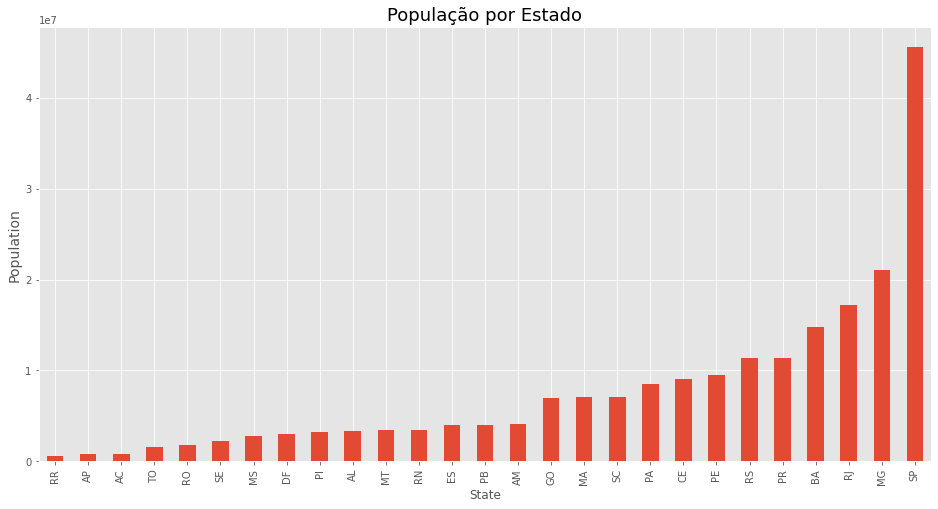

In [410]:
states_group.Population.sum().sort_values().plot(kind='bar')
plt.title('População por Estado', fontsize = 18)
plt.ylabel('Population', fontsize = 14)
plt.xlabel('State')

Text(0.5, 0, 'State')

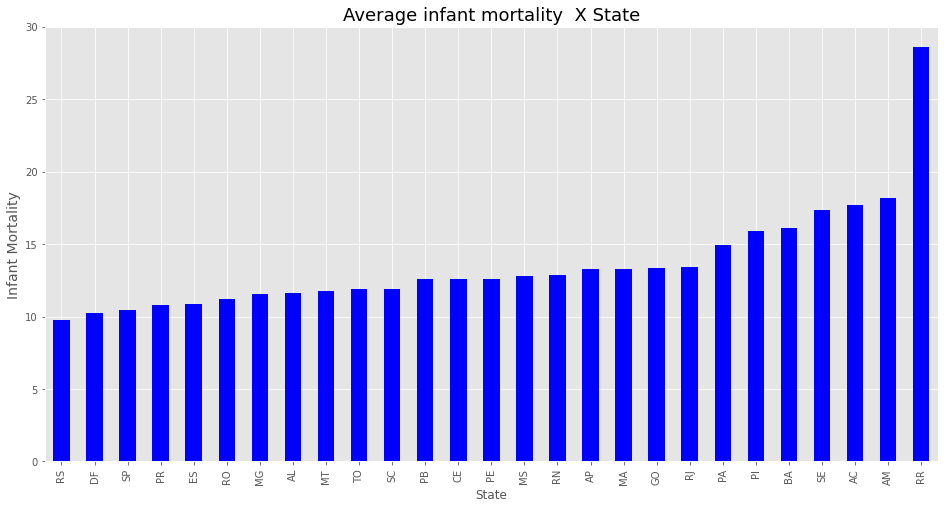

In [441]:
states_group['Infant Mortality'].mean().sort_values().plot(kind='bar', color = 'blue')
plt.title('Average infant mortality  X State', fontsize = 18)
plt.ylabel('Infant Mortality', fontsize = 14)
plt.xlabel('State')

Text(0.5, 0, 'State')

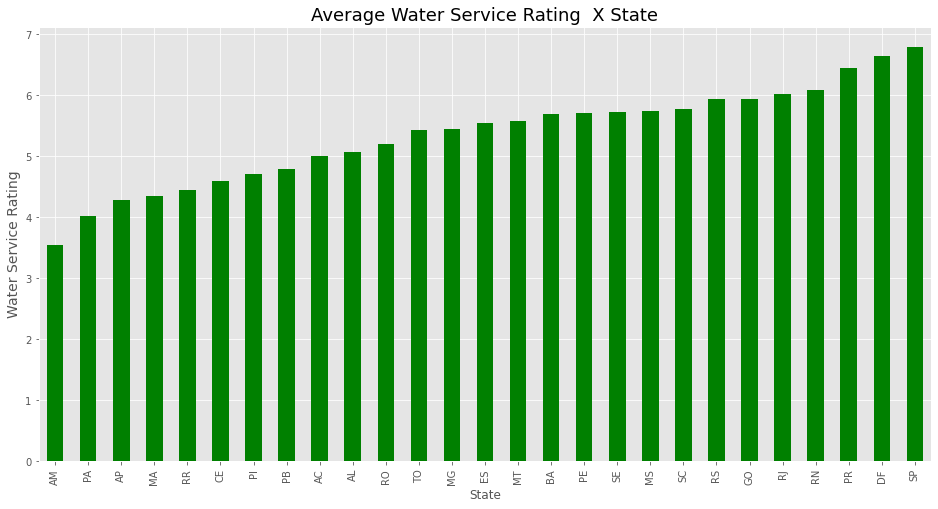

In [413]:
states_group['Water Service Rating'].mean().sort_values().plot(kind='bar', color = 'green')
plt.title('Average Water Service Rating  X State', fontsize = 18)
plt.ylabel('Water Service Rating', fontsize = 14)
plt.xlabel('State')

Text(0.5, 0, 'State')

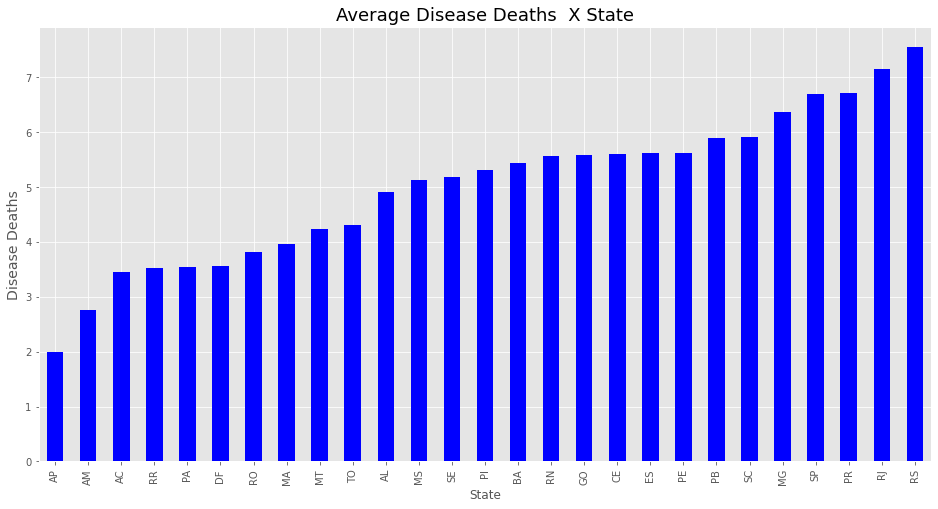

In [439]:
states_group['Disease Deaths'].mean().sort_values().plot(kind='bar', color = 'blue')
plt.title('Average Disease Deaths  X State', fontsize = 18)
plt.ylabel('Disease Deaths', fontsize = 14)
plt.xlabel('State')

In [416]:
df_PR = df.query('State == "PR"')

In [418]:
df_PR.query('City == "Cascavel"')

,City,State,Region,Population,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Sewage Rating,Water Service Rating,Garbage Service Rating
3831,Cascavel,PR,South,324476,4.487235,0.048635,6.48561,10,7.968134,8.773199


In [427]:
df['Water Service Rating'].sort_values().tail(50)

5135    9.196551
5252    9.205068
4657    9.220103
124     9.220103
4254    9.220790
3039    9.229829
5054    9.260518
2300    9.283659
2646    9.289552
2405    9.293700
3589    9.293700
4862    9.293700
2968    9.297783
4443    9.300000
1539    9.300462
2605    9.302482
3686    9.318342
4785    9.319965
3200    9.333052
3206    9.342383
5143    9.365927
3936    9.388303
3213    9.420103
4779    9.423157
720     9.425785
5036    9.439159
3986    9.456727
4041    9.464805
3612    9.500000
3640    9.500000
5144    9.500000
2550    9.533598
4869    9.547587
4536    9.586824
1825    9.591111
3933    9.593700
4781    9.593700
3524    9.593700
3302    9.593700
3619    9.593700
5382    9.600000
5118    9.615346
4129    9.700000
4015    9.700000
2078    9.793700
129     9.793700
3407    9.793700
4800    9.793700
4204    9.793700
3735    9.900000
Name: Water Service Rating, dtype: float64

In [431]:
df.loc[3735]

City                          Tupi Paulista
State                                    SP
Region                            Southeast
Population                            15404
Disease Deaths                      8.89379
Death Rate Hospitalization        0.0410881
Infant Mortality                    16.9492
Sewage Rating                            10
Water Service Rating                    9.9
Garbage Service Rating              7.91902
Name: 3735, dtype: object

In [432]:
df.head()

,City,State,Region,Population,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Sewage Rating,Water Service Rating,Garbage Service Rating
0,Alta Floresta D'Oeste,RO,North,23167,4.791298,0.022016,7.352941,0,4.681414,1.850000
1,Ariquemes,RO,North,106168,4.125537,0.034575,15.457788,4,7.642549,6.777637
2,Cabixi,RO,North,5438,5.516734,0.045545,12.195122,0,5.300000,3.050000
3,Cacoal,RO,North,84813,5.046396,0.044616,13.139696,"5,333978235",6.010462,1.850000
4,Cerejeiras,RO,North,16444,5.837996,0.026051,15.151515,0,6.862726,4.972964


In [437]:
df.loc[(df['Disease Deaths']) < 1]

,City,State,Region,Population,Disease Deaths,Death Rate Hospitalization,Infant Mortality,Sewage Rating,Water Service Rating,Garbage Service Rating
288,Pracuuba,AP,North,4993,0.801122,0.109898,0.000000,0,3.900000,2.882696
410,Sao Felix do Tocantins,TO,North,1572,0.636132,0.000000,0.000000,0,4.979416,1.850000
438,Araguana,MA,Northeast,15297,0.784468,0.016674,8.403361,0,4.300000,1.850000
